<a href="https://colab.research.google.com/github/dev-abby110/AgroPrice-Forecast-/blob/main/Heart_Diesease_prediction_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step a: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Step b: Load dataset
data = pd.read_csv('heart.csv')


In [10]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step d: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Step e: Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
print(f"Class Weights: {class_weights}")


Class Weights: {0: np.float64(1.0327455919395465), 1: np.float64(0.9692671394799054)}


In [29]:
# Step f: Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])




In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6329 - loss: 0.6353 - val_accuracy: 0.7622 - val_loss: 0.5496
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8317 - loss: 0.4707 - val_accuracy: 0.7866 - val_loss: 0.4609
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8819 - loss: 0.3603 - val_accuracy: 0.8049 - val_loss: 0.4261
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8925 - loss: 0.3033 - val_accuracy: 0.8049 - val_loss: 0.4093
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9134 - loss: 0.2786 - val_accuracy: 0.8232 - val_loss: 0.4028
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.2507 - val_accuracy: 0.8293 - val_loss: 0.3886
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9149 - loss: 0.2439 - val_accuracy: 0.8415 - val_loss: 0.3834
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8973 - loss: 0.2635 - val_accuracy: 0.8598 - val_loss

In [25]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9977 - loss: 0.0287 - val_accuracy: 0.9207 - val_loss: 0.2120
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9980 - loss: 0.0280 - val_accuracy: 0.9207 - val_loss: 0.2107
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0264 - val_accuracy: 0.9207 - val_loss: 0.2088
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0236 - val_accuracy: 0.9329 - val_loss: 0.2114
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.0198 - val_accuracy: 0.9329 - val_loss: 0.2072
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0309 - val_accuracy: 0.9329 - val_loss: 0.2017
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9993 - loss: 0.0245 - val_accuracy: 0.9329 - val_loss: 0.2090
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9970 - loss: 0.0221 - val_accuracy: 0.9329 - val_loss:

In [26]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9371 - loss: 0.3113 
Test Accuracy: 0.9561


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<Figure size 600x600 with 0 Axes>

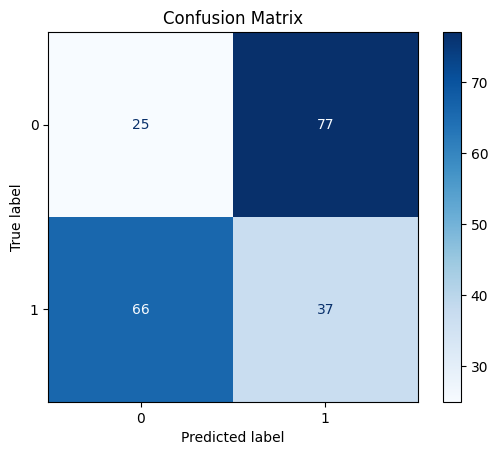

In [30]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_classes), display_labels=[0,1]).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


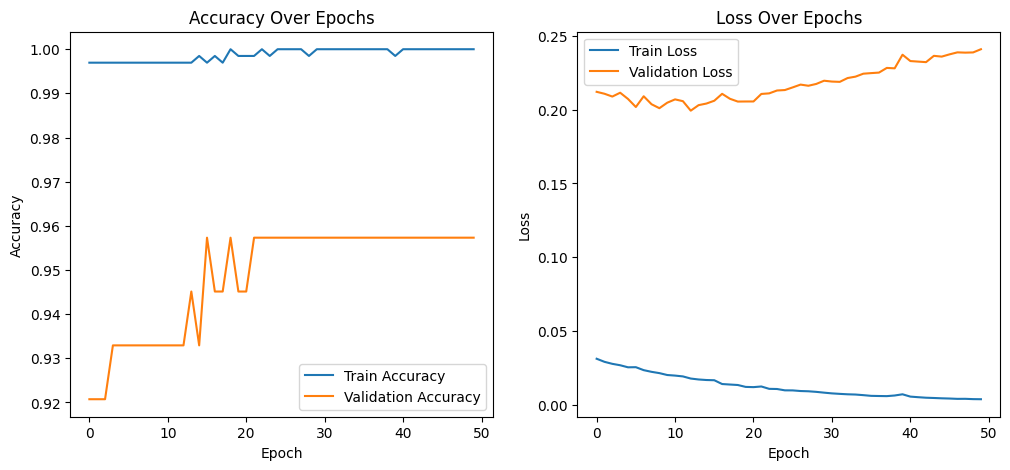

In [31]:
# Accuracy and Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
